* [0. Introduction](#0)   
* [1. Import Modules](#1)
* [2. Load & Read Data](#2)
* [3. EDA and Feature Engineering](#3)
    * [3.1. Univariate Explore](#3-1)
    * [3.2. Bivariate Explore](#3-2)


## <b id="0">Introduction</b><br>
When it comes to data science, the industry development indicator is job offers by companies. We have some questions we want to answer:
- What are the most opportunities in the field, are you for beginners,intermediate ,senior or exepert experience?
- What kind of companies hire data scientists?
- Is there an increase or decrease in the number of jobs since 2020?
- What is the average salary for data science at all companies?
- What are the most in-demand majors in data science?


Refrence Notebooks : 
- https://www.kaggle.com/code/loaiabdalslam/data-science-jobs-report/notebook?fbclid=IwAR3rWb-eqzuhDbDY5V3hlzAdgBRnm9gLq9fLXpsFIE6NPj9J6nwma0rwWzY

## <b id="1"> Import Modules </b><br>


In [12]:
## numpy and pandas for data wrangling

import numpy as np
import pandas as pd

## matplotlib and seaborn for data viz
import matplotlib.pyplot as plt
import seaborn as sns


## pycountry to deal with ISO 3166 codes in the data
import pycountry

## <b id="2"> Load & Read Data </b><br>


In [2]:
Salaries =pd.read_csv('ds_salaries.csv',index_col=0)
Salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
Salaries.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [4]:
Salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [5]:
Salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
Salaries.describe(include = "O")

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [7]:
# are there null value in data?
Salaries.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
# are there duplicate rows in data?
Salaries.duplicated().sum()

42

In [9]:
Salaries.drop_duplicates(inplace = True )

In [10]:
Salaries.shape

(565, 11)

In [11]:
# Replacing values for remote_ratio and experience_level to improve legibility

Salaries.remote_ratio.replace([100,50,0], ["Remote", "Hybrid" ,"On-Site"], inplace=True)
Salaries.experience_level.replace(["EN", "MI", "SE", "EX"], ["Entry", "Mid", "Senior", "Executive"], inplace=True)
Salaries.employment_type.replace(["FT", "PT", "FL", "CT"], ["Full-Time", "Part_time", "Freelacer", "Contract"], inplace=True)
Salaries.company_size.replace(["L", "S", "M"], ["Large", "Small", "medium"], inplace=True)

In [12]:
# We are going to need to adjust the table to show the full names of the countries for better readability

country_list = []
for country_code in Salaries.company_location:
    country_list.append(pycountry.countries.get(alpha_2=country_code).name)
    
Salaries['company_location'] = country_list

In [13]:
# Filtering the salaries to display columns of interest
salaries_jobs = Salaries.columns.isin(["salary_currency" , "salary","employee_residence"])

salaries_jobs = Salaries.columns[~salaries_jobs]

salaries_jobs = Salaries[salaries_jobs]
salaries_jobs

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,Mid,Full-Time,Data Scientist,79833,On-Site,Germany,Large
1,2020,Senior,Full-Time,Machine Learning Scientist,260000,On-Site,Japan,Small
2,2020,Senior,Full-Time,Big Data Engineer,109024,Hybrid,United Kingdom,medium
3,2020,Mid,Full-Time,Product Data Analyst,20000,On-Site,Honduras,Small
4,2020,Senior,Full-Time,Machine Learning Engineer,150000,Hybrid,United States,Large
...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-Time,Data Engineer,154000,Remote,United States,medium
603,2022,Senior,Full-Time,Data Engineer,126000,Remote,United States,medium
604,2022,Senior,Full-Time,Data Analyst,129000,On-Site,United States,medium
605,2022,Senior,Full-Time,Data Analyst,150000,Remote,United States,medium


## <b id="2"> Apply EDA</b><br>
1.Univariate Analysis: in univariate analysis, there is only one dependable variable. The objective of univariate analysis is to derive the data, define and summarize it, and analyze the pattern present in it. In a dataset, it explores each variable separately. It is possible for two kinds of variables- Categorical and Numerical.

2 Bivariate Analysis:The analysis is related to cause and the relationship between the two variables. There are three types of bivariate analysis. The analysis is related to cause and the relationship between the two variables. There are three types of bivariate analysis.(numerical-numerical,categorical-categorical,numrical-categorical)

## <b id="3-1"> Univariate Analysis</b><br>


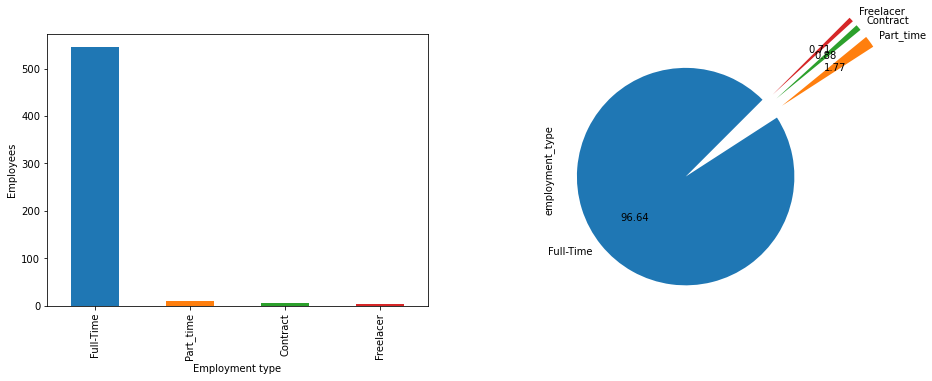

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(121)
salaries_jobs['employment_type'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.xlabel("Employment type")
plt.ylabel("Employees")

plt.subplot(122)
salaries_jobs['employment_type'].value_counts().plot(kind='pie',autopct = "%.2f" , explode = [0.1,1,1,1],startangle = 45)
plt.show()

<center>Graph (1-1)</center>

<b id="3-1-1">1 - Employment Type:</b><br>
From Graph (1-1) its Represent That The Most of jobs is Full Time more than 96% of entries is assigned to full time job 

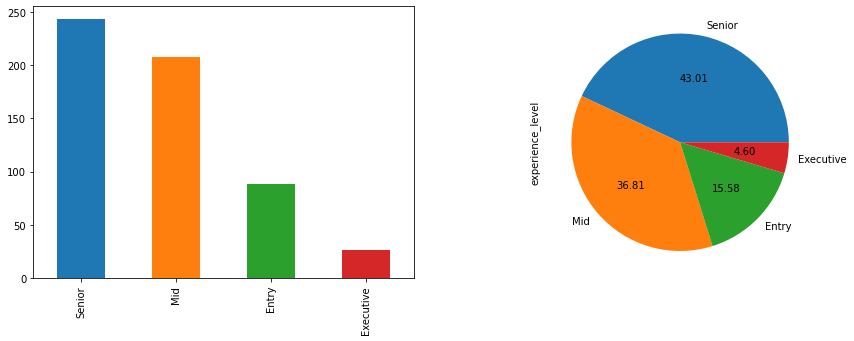

In [15]:
#level of Exprince
plt.figure(figsize=(15,5))
plt.subplot(121)
salaries_jobs['experience_level'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.subplot(122)
salaries_jobs['experience_level'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

<center>Graph (1-2) </center>

<b id="3-1-2">2 -  Level of Expereince:</b><br>
From Graph (1-2) its Represent That The Most of level of experience on demand is senior level that's make sense because compaines need someone ready for jobs missions , SE Level is 46.13% then there is mid Level with 35.09% and Entry Level with 14.5%

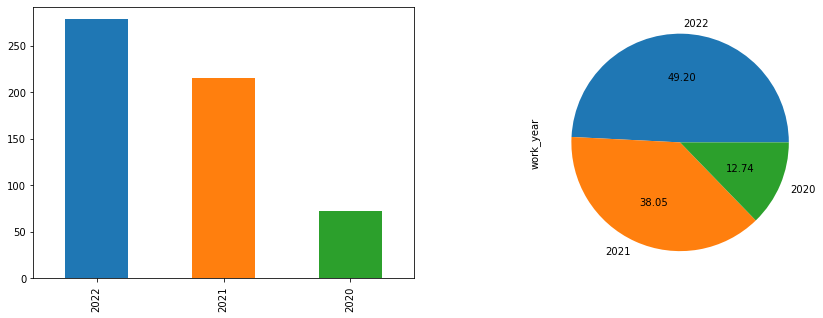

In [16]:
#employees in every year

plt.figure(figsize=(15,5))
plt.subplot(121)
salaries_jobs["work_year"].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.subplot(122)
salaries_jobs["work_year"].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

<center>Graph (1-3) </center>

<b id="3-1-3">3 - Jobs Need By Year:</b><br>

Graph (1-3) represents the increase in job hiring over time, In 2022, it increased by 11% from 2021, 
and in 2021, it increased by  20% from 2020.

<AxesSubplot:ylabel='remote_ratio'>

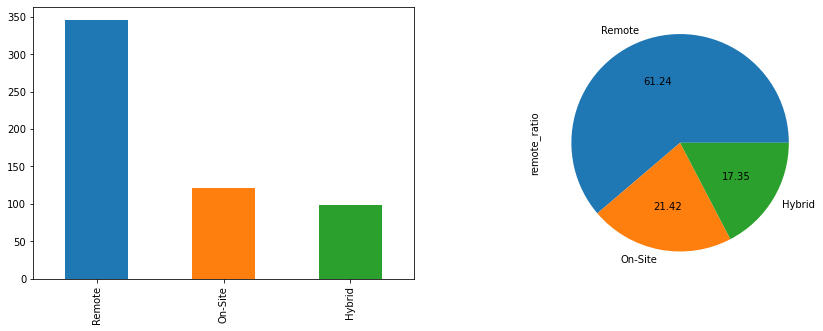

In [17]:
#remote ratio
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
salaries_jobs['remote_ratio'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.subplot(1,2,2)
salaries_jobs['remote_ratio'].value_counts().plot(kind='pie',autopct="%.2f")

<center>Graph (1-4) </center>


<b id="3-1-4">4 - Remote Ratio:</b><br>
From Graph (1-4) its Represent the most jobs full remote job with  61.77% follwing by  on-site jobs with 20.92% and finally hybrid jobs with 17.35%.

<AxesSubplot:ylabel='company_size'>

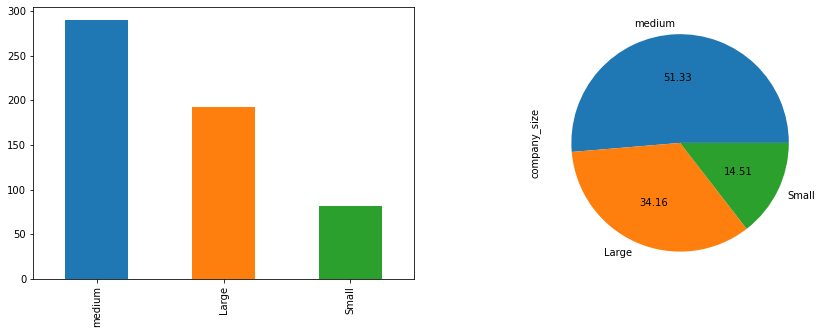

In [18]:
#company size
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
salaries_jobs['company_size'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.subplot(1,2,2)
salaries_jobs['company_size'].value_counts().plot(kind='pie',autopct="%.2f")

<center> Figure (1-5) </center>


<b id="3-1-5">5- Company Size:</b><br>
From Graph (1-5) its Represent that is  prelavent company size is medium with 53.71% percentage after large campanies with 34.16%.  

<AxesSubplot:>

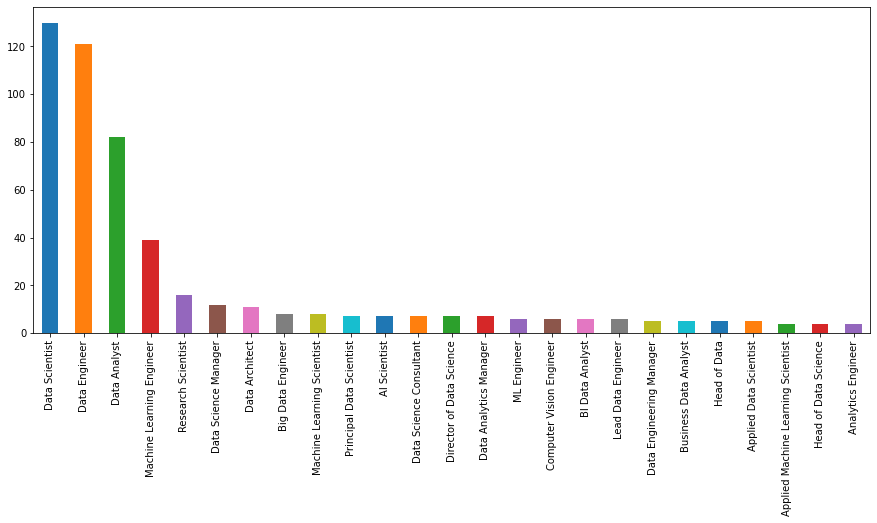

In [19]:
#job titles
plt.figure(figsize=(15,6))
Salaries['job_title'].value_counts()[:25].plot(kind='bar',color=sns.color_palette("tab10"))

<center> Figure (1-6) </center>


<b id="3-1-6">6- Job Title :</b><br>
Graph (1-6) represents in-demand jobs, it's clear that the data scientist job comes first after comes data engineer job and data Analyst.

Text(0.5, 0, 'Salary in USD')

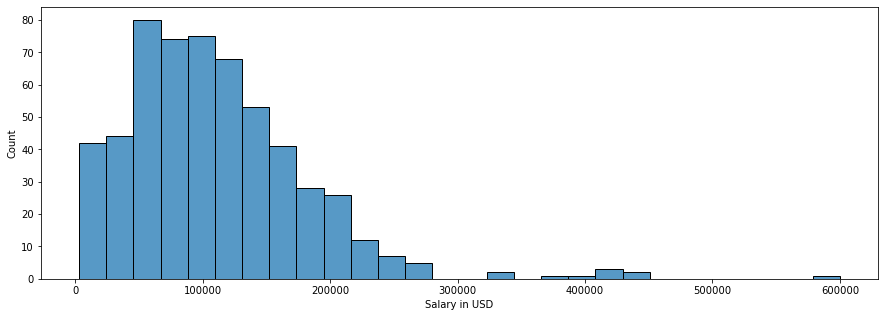

In [20]:
plt.figure(figsize=(15,5))
sns.histplot(Salaries['salary_in_usd'])
plt.xlabel('Salary in USD')

<center> Figure (1-7) </center>


<b id="3-1-7">7- Salary in usd :</b><br>
Graph (1-7) represents  Distrubtion of Salary for Data Jobs in the worled , it's clear  is the moat paid salary is 100000 annualy ,Skewed Right Distributions that make us observe that the most salaries is around 10k~250K ,and there some outlire entire

In [21]:
# numbers of campany per country


salaries_jobs['company_location'].value_counts()

United States                318
United Kingdom                46
Canada                        28
Germany                       27
India                         24
France                        15
Spain                         14
Greece                        10
Japan                          6
Netherlands                    4
Austria                        4
Portugal                       4
Poland                         4
Luxembourg                     3
Pakistan                       3
Brazil                         3
United Arab Emirates           3
Mexico                         3
Australia                      3
Turkey                         3
Denmark                        3
Italy                          2
Czechia                        2
Slovenia                       2
Russian Federation             2
Switzerland                    2
Nigeria                        2
China                          2
Belgium                        2
Viet Nam                       1
Estonia   

* As we see The US has the large number of Campanies after The UK

<AxesSubplot:>

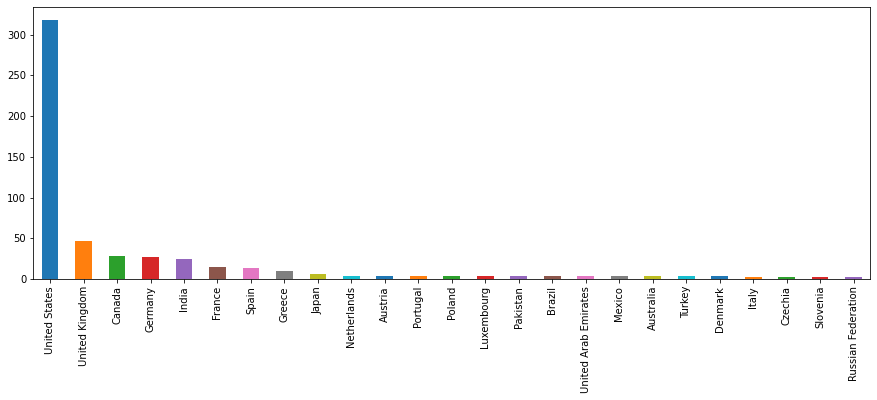

In [22]:
plt.figure(figsize=(15,5))
salaries_jobs['company_location'].value_counts()[0:25].plot(kind='bar',color=sns.color_palette("tab10"))

<center> Figure (1-8) </center>


<b id="3-1-8">8- Numbers of companies per country  :</b><br>
Graph (1-8) represents the Distribution of numbers of companies per country, it's clear that The US has a large number of Companies after The UK, Canada, Germany, and India respectively.

## <b id="3-2"> Bivariate Analysis</b><br>


In [23]:
Salaries.corr()

,work_year,salary,salary_in_usd
work_year,1.000000,-0.082597,0.159326
salary,-0.082597,1.000000,-0.083728
salary_in_usd,0.159326,-0.083728,1.000000


<AxesSubplot:>

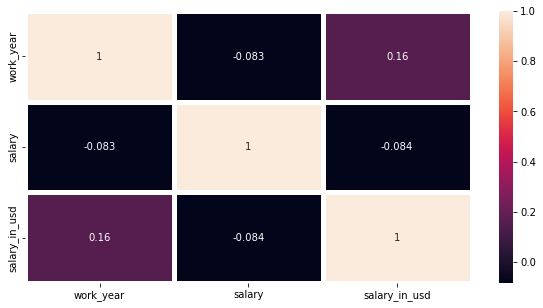

In [24]:
plt.figure(figsize=(10,5))

sns.heatmap(Salaries.corr(), annot=True, linewidths = 5)

<center> Figure (2-1) </center>


<b id="3-2-1">1 - Variables Correlation </b><br>
Graph (2-1) represents The Correlation between all numerical variables , from this Graph we will select The most interconnection between the Variables .
- work year has a correlation with salary in usd by (0.17)



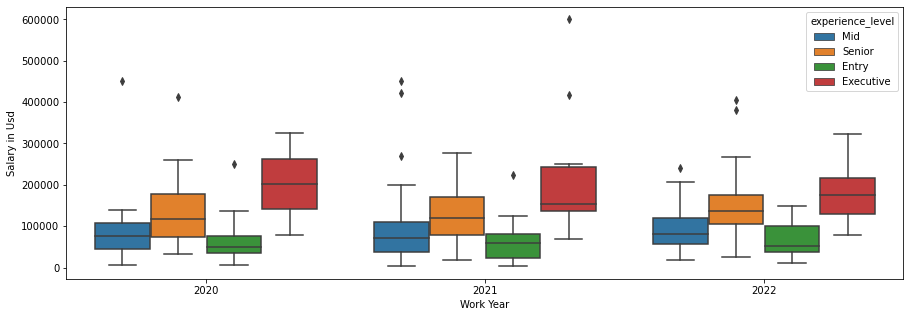

In [25]:
#salary in every year by Exprience_level using  box plot
# in box plot easyly detect the outlier
plt.figure(figsize=(15,5))
sns.boxplot(x= salaries_jobs['work_year'],y = salaries_jobs['salary_in_usd'],hue=salaries_jobs['experience_level'])
plt.xlabel('Work Year')
plt.ylabel('Salary in Usd')
plt.show()

<center> Figure (2-2) </center>


<b id="3-2-2">2 -How do these jobs increase in pay as experience level increases?  </b><br>

Graph (2-2) represents that largest paid salary assigend to Expert experience level after senior , There some experts and senire jobs have salary over 400k it is clear these are outlire entires.  

In [26]:
Remote_or_not = Salaries.groupby(["remote_ratio","work_year"])["salary_in_usd"].mean().sort_values(ascending = False)
Remote_or_not

remote_ratio  work_year
Remote        2022         127772.293814
On-Site       2022         114672.722222
Remote        2021         113407.491379
              2020         106693.611111
Hybrid        2022          97875.666667
On-Site       2020          95210.000000
              2021          91630.823529
Hybrid        2021          78566.492308
              2020          77591.238095
Name: salary_in_usd, dtype: float64

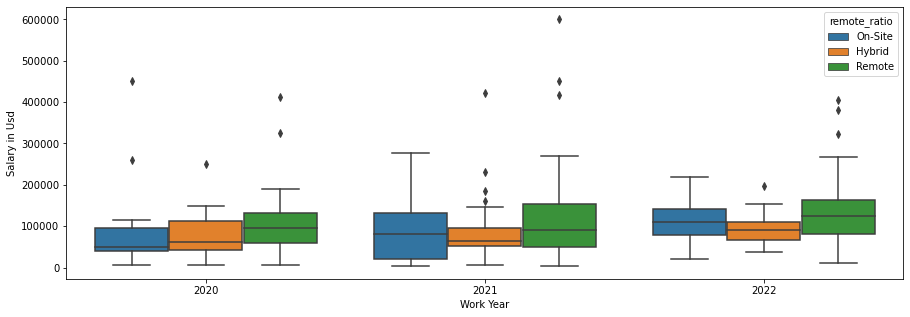

In [27]:
#salary in every year by company_size using box plot
# in box plot easyly detect the outlier
plt.figure(figsize=(15,5))
sns.boxplot(x = salaries_jobs['work_year'],y = salaries_jobs['salary_in_usd'],hue=salaries_jobs['remote_ratio'])
plt.xlabel('Work Year')
plt.ylabel('Salary in Usd')
plt.show()

<center> Figure (2-3) </center>

<b id="3-2-3">3 - Are On-site jobs paid salary better than Remot? Hybrid?  </b><br>

Graph (2-3) represents that the average salary paid for full remote jobs increases over time from 2020 after On-site jobs and Hybrid jobs respectively.


In [28]:
Cam_size = Salaries.groupby(["company_size","work_year"])["salary_in_usd"].mean().sort_values(ascending = False)

Cam_size

company_size  work_year
Large         2022         128554.883721
medium        2022         124427.372197
Large         2021         117772.581197
medium        2020         115467.500000
Large         2020         106303.848485
Small         2021          81509.844444
              2022          78633.750000
medium        2021          74154.792453
Small         2020          70958.560000
Name: salary_in_usd, dtype: float64

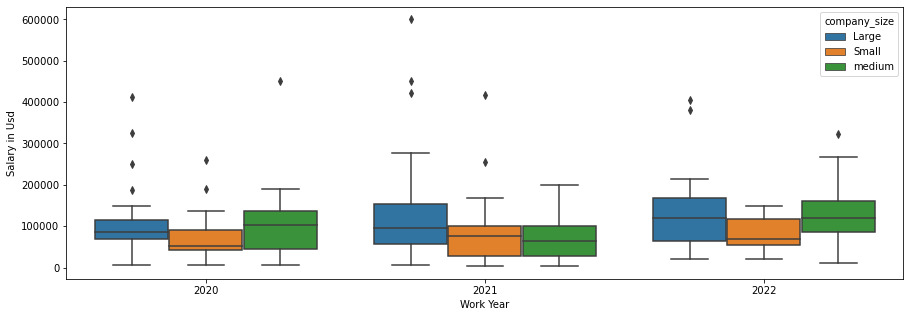

In [29]:
#salary in every year by Exprience_level using bar plot and box plot
# in box plot easyly detect the outlier
plt.figure(figsize=(15,5))
sns.boxplot(x = salaries_jobs['work_year'],y = salaries_jobs['salary_in_usd'] , data = salaries_jobs,hue=salaries_jobs['company_size'])
plt.xlabel('Work Year')
plt.ylabel('Salary in Usd')
plt.show()

<center> Figure (2-4) </center>


<b id="3-2-4">4- Salary & Company Size   </b><br>
Graph (2-4) represent That largest paid salary for data jobs is offered by Large companies ,average salary in increase year by year

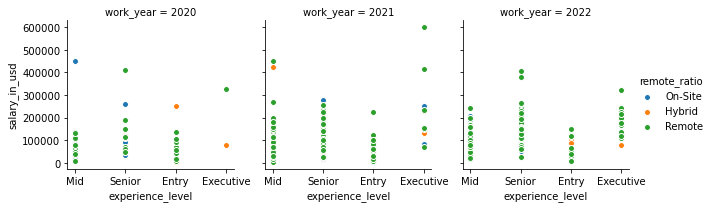

In [30]:
graph = sns.FacetGrid(Salaries, col = "work_year",  hue ="remote_ratio")
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "experience_level", "salary_in_usd", edgecolor ="w").add_legend()
# show the object
plt.show()

<center> Figure (2-5) </center>

<b id = "3-2-5">5- Salary for remote ratio per experience level by year </b><br>

Graph (2-5) represents the full remote jobsThe Most Sought Jobs for every experience level and paid average salary better than other remote ratio jobs. 